# Session 10

## $\chi^2$ Test for Independence
- Load the dataset
- Take the sepal length and width
- Convert the column entries to "short" and "long" by comparing with the column's median.
- Apply the $\chi^2$ test with $\alpha = 0.05$
- Comment on the hypothesis.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats

In [2]:
URL = "https://raw.githubusercontent.com/Armagaan/"\
    "Data-Analytics-with-Python/main/week-8/IRIS.csv"

df = pd.read_csv(URL, header=0)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df = df[["sepal_length", "sepal_width"]]
df.head()

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [4]:
length_median = df.sepal_length.median()
width_median = df.sepal_width.median()

print(length_median, width_median)

5.8 3.0


In [5]:
df["length"] = (df.sepal_length > length_median).astype(int)
df["width"] = (df.sepal_width > width_median).astype(int)

df.sample(frac=0.1)

<ipython-input-5-7fa982eca0dd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["length"] = (df.sepal_length > length_median).astype(int)
<ipython-input-5-7fa982eca0dd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["width"] = (df.sepal_width > width_median).astype(int)


,sepal_length,sepal_width,length,width
114,5.8,2.8,0,0
106,4.9,2.5,0,0
96,5.7,2.9,0,0
85,6.0,3.4,1,1
142,5.8,2.7,0,0
138,6.0,3.0,1,0
98,5.1,2.5,0,0
76,6.8,2.8,1,0
131,7.9,3.8,1,1
118,7.7,2.6,1,0


In [6]:
cross_table = pd.pivot_table(
    data=df[["length", "width"]],
    index="length",
    columns="width",
    aggfunc=len,
).values

cross_table

array([[38, 42],
       [45, 25]])

In [7]:
h0 = "The columns are independent" # not dependent
h1 = "The columns are dependent"

ALPHA = 0.05 # greater side of the curve
DOF = (cross_table.shape[0] - 1) * (cross_table.shape[1] - 1)

chi_u = stats.chi2.ppf(q=1 - ALPHA, df=DOF)
print(chi_u)

3.841458820694124


In [8]:
chi, pval, dof, exp_cross_table = stats.chi2_contingency(cross_table, correction=False)

In [9]:
chi, pval

(4.25604336321833, 0.03911091585039266)

In [10]:
exp_cross_table

array([[44.26666667, 35.73333333],
       [38.73333333, 31.26666667]])

In [11]:
# Using p-value
print(pval, ALPHA)
if pval <= ALPHA:
    print("Reject the null hypothesis: Columns are dependent")
else:
    print("Cannot reject the null hypothesis.")

0.03911091585039266 0.05
Reject the null hypothesis: Columns are dependent


In [12]:
# Using the chi2 value
print(chi, chi_u)
if chi >= chi_u:
    print("Reject the null hypothesis: Columns are dependent")
else:
    print("Cannot reject the null hypothesis.")

4.25604336321833 3.841458820694124
Reject the null hypothesis: Columns are dependent


## $\chi^2$ Goodness of Fit
- Temperature for every day of the year
- Whether the distiribution is Normal

In [13]:
URL = "https://raw.githubusercontent.com/Armagaan/"\
    "Data-Analytics-with-Python/main/week-10/distribution.csv"

df = pd.read_csv(URL, header=0)
df.head(10)

,temp
0,31.052086
1,21.614336
2,6.885481
3,30.519586
4,23.033692
5,-6.621896
6,17.805832
7,18.312879
8,14.923916
9,5.885725


In [14]:
# Assume normal
h0 = "Populuation is normal"
ha = "Population isn't normal"

ALPHA = 0.05
DOF = len(df) - 1 - 2 # k - 1 - p

chi_u = stats.chi2.ppf(1 - ALPHA, df=DOF) # inverse of cdf
print(chi_u)

407.36601537620385


In [15]:
mean = df.temp.mean()
std = df.temp.std()

num_intervals = 12
area_under_first_bin = 1 / num_intervals

bins = []
for i in range(1, num_intervals + 1):
    bins.append(
        stats.norm.ppf(i * area_under_first_bin, loc=mean, scale=std)
    )

bins

[6.884466481964834,
 10.842516800525793,
 13.632496159304587,
 15.954170247028785,
 18.05236977494287,
 20.05655929815203,
 22.06074882136119,
 24.158948349275278,
 26.480622436999475,
 29.27060179577827,
 33.228652114339226,
 inf]

In [16]:
def bin_element(x, bins):
    for i, bin in enumerate(bins):
        if x <= bin:
            return i

In [17]:
df["bins"] = df.temp.apply(lambda x: bin_element(x, bins))

df.sample(frac=0.05)

,temp,bins
163,24.350897,8
210,20.710905,6
161,14.517083,3
231,29.252977,9
18,25.315291,8
214,23.945831,7
167,12.572485,2
79,25.897186,8
286,25.508526,8
266,28.842192,9


In [18]:
all(df.bins.value_counts() >= 5)

True

In [19]:
cross_tab = df.groupby("bins").count().values.flatten()

cross_tab

array([27, 35, 37, 31, 32, 27, 30, 28, 25, 33, 32, 28])

In [20]:
exp_cross_tab = np.ones_like(cross_tab) * len(df) / num_intervals

exp_cross_tab

array([30.41666667, 30.41666667, 30.41666667, 30.41666667, 30.41666667,
       30.41666667, 30.41666667, 30.41666667, 30.41666667, 30.41666667,
       30.41666667, 30.41666667])

In [21]:
chi, pval = stats.chisquare(f_obs=cross_tab, f_exp=exp_cross_tab, ddof=2)

print(chi, pval)

4.632876712328767 0.8650660324028119


In [22]:
# Using p-value
print(pval, ALPHA)
print()
if pval <= ALPHA:
    print("Reject the null hypothesis: Columns are dependent")
else:
    print("Cannot reject the null hypothesis.")

0.8650660324028119 0.05

Cannot reject the null hypothesis.


In [23]:
# Using the chi2 value
print(chi, chi_u)
print()
if chi >= chi_u:
    print("Reject the null hypothesis: Columns are dependent")
else:
    print("Cannot reject the null hypothesis.")

4.632876712328767 407.36601537620385

Cannot reject the null hypothesis.


## Cluster Analysis
- Normalization (std)
- Normalization (mean absolute deviation)
- Distance functions
  - Euclidean (geometric)
  - Manhatten
  - Minkowski

In [24]:
x = np.random.uniform(low=0, high=10, size=20)
x

array([5.88781672, 7.58289105, 6.23893882, 2.94131393, 4.2272325 ,
       0.88083311, 8.82874946, 9.81902507, 6.91846242, 5.6706431 ,
       4.6760657 , 1.5905071 , 8.19413874, 5.9364962 , 7.36871341,
       6.12202312, 0.55211657, 0.38374826, 0.44833041, 1.98226954])

In [25]:
y = np.random.uniform(low=1000, high=2000, size=20)
y

array([1208.85381713, 1671.78000937, 1255.52710984, 1821.44000141,
       1017.6469617 , 1698.31738249, 1434.62830351, 1012.7625097 ,
       1851.084185  , 1844.31614257, 1280.17728236, 1294.44656574,
       1007.50499074, 1075.33692118, 1663.92326452, 1808.60623529,
       1747.11504937, 1416.09042141, 1937.06697698, 1958.80500743])

(0.0, 2000.0)

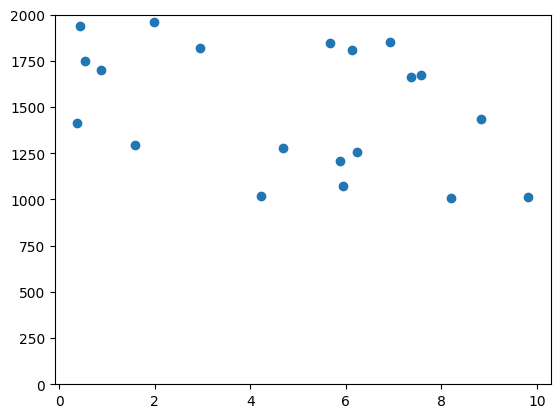

In [26]:
plt.scatter(x, y)
plt.ylim(0, 2000)

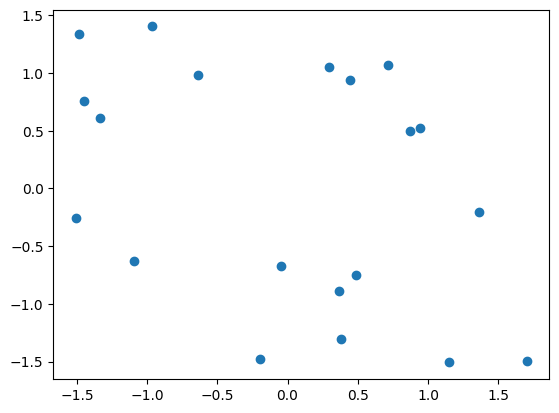

In [27]:
x_norm = (x - x.mean()) / x.std()
y_norm = (y - y.mean()) / y.std()

plt.scatter(x_norm, y_norm)
plt.show()

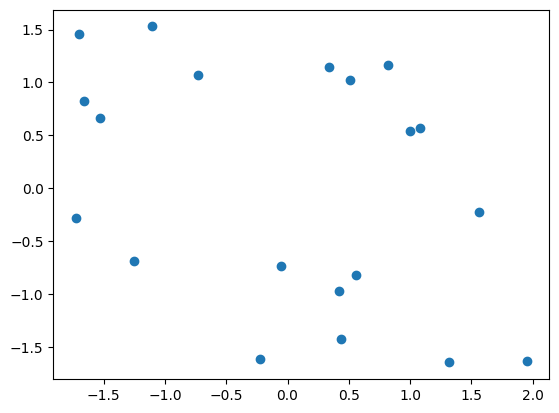

In [28]:
xs_f = np.abs(x - x.mean()).mean()
ys_f = np.abs(y - y.mean()).mean()

x_norm = (x - x.mean()) / xs_f
y_norm = (y - y.mean()) / ys_f

plt.scatter(x_norm, y_norm)
plt.show()

In [29]:
p0 = np.array((x[0], y[0]))

p1 = np.array((x[10], y[10]))

print(p0, p1)

[   5.88781672 1208.85381713] [   4.6760657  1280.17728236]


In [34]:
euc = np.sqrt(np.square(p0 - p1).sum())
man = np.abs(p0 - p1).sum()

p = 5
mink = (np.abs(p0 - p1) ** p).sum() ** (1/p)

In [33]:
euc, man, mink

(71.33375801668726, 72.5352162455572, 71.33375801668726)